# Lab02_Data_Analytics

## Chương 13: Các Ví dụ Phân tích Dữ liệu (Data Analysis Examples)

### 13.3. Tên Trẻ em ở Mỹ 1880–2010 (US Baby Names 1880–2010)

Cơ quan An sinh Xã hội Hoa Kỳ (SSA) đã công bố dữ liệu về tần suất các tên trẻ sơ sinh từ năm 1880 đến nay. Hadley Wickham, tác giả của một số gói R phổ biến, đã sử dụng bộ dữ liệu này để minh họa cách xử lý dữ liệu trong R.

Chúng ta cần thực hiện một số bước xử lý dữ liệu để tải bộ dữ liệu này, nhưng sau khi hoàn thành, chúng ta sẽ có một **DataFrame** có dạng như sau:


In [1]:
# Importing các thư viện Python cần thiết
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
names1880 = pd.read_csv("data/names/yob1880.txt", names=["name", "sex", "births"])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [3]:
names1880.groupby("sex")["births"].sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [4]:
pieces = []
for year in range(1880, 2011):
    path = f"data/names/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)
    
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [5]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692627,Zymaire,M,5,2010
1692628,Zyonne,M,5,2010
1692629,Zyquarius,M,5,2010
1692630,Zyran,M,5,2010


In [6]:
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)
total_births.tail()

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_18148\1704434596.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)


sex,F,M
year,,
2006,1901070,2055119
2007,1922448,2075235
2008,1890718,2039947
2009,1836870,1983305
2010,1777327,1918412


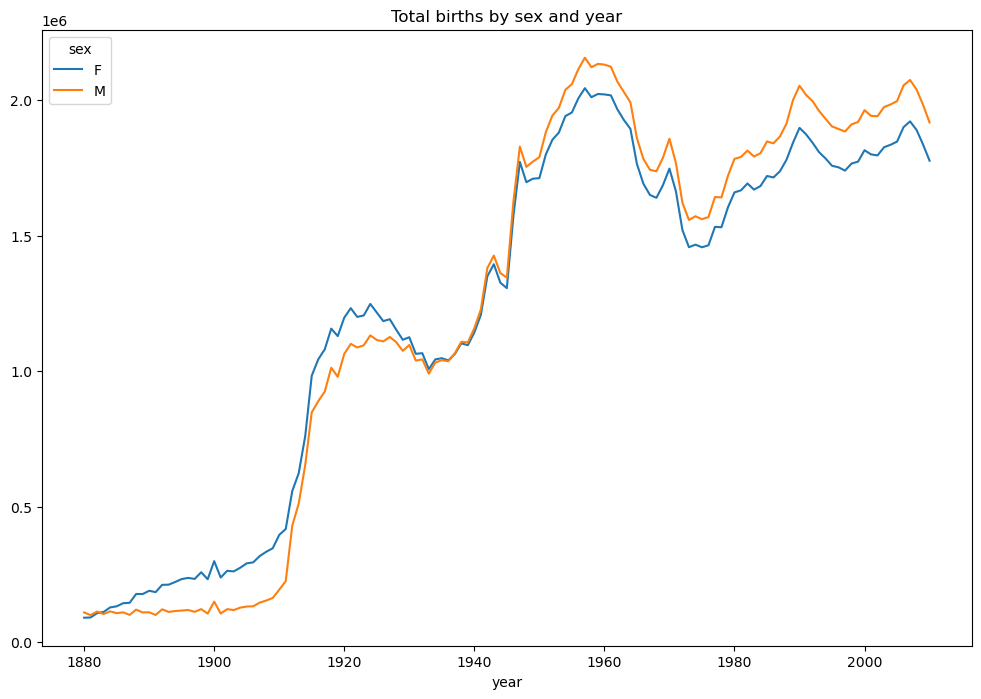

In [7]:
total_births.plot(title="Total births by sex and year", figsize=(12, 8))
plt.show()

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692627,Zymaire,M,5,2010
1692628,Zyonne,M,5,2010
1692629,Zyquarius,M,5,2010
1692630,Zyran,M,5,2010


In [9]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"]).apply(add_prop)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_18148\2813635758.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year", "sex"]).apply(add_prop)


In [10]:
names

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1692627    Zymaire   M       5  2010  0.000003
         1692628     Zyonne   M       5  2010  0.000003
         1692629  Zyquarius   M       5  2010  0.000003
         1692630      Zyran   M       5  2010  0.000003
         1692631      Zzyzx   M       5  2010  0.000003

[1692632 rows x 5 columns]

In [12]:
names = names.reset_index(drop=True)

In [13]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [14]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_18148\2738497238.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [15]:
top1000 = top1000.reset_index(drop=True)

In [16]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


#### Phân tích xu hướng đặt tên theo thời gian


In [17]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

total_births = top1000.pivot_table("births", index="year", columns="name", aggfunc=sum)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_18148\4181198915.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = top1000.pivot_table("births", index="year", columns="name", aggfunc=sum)


In [18]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6848 entries, Aaden to Zuri
dtypes: float64(6848)
memory usage: 6.8 MB


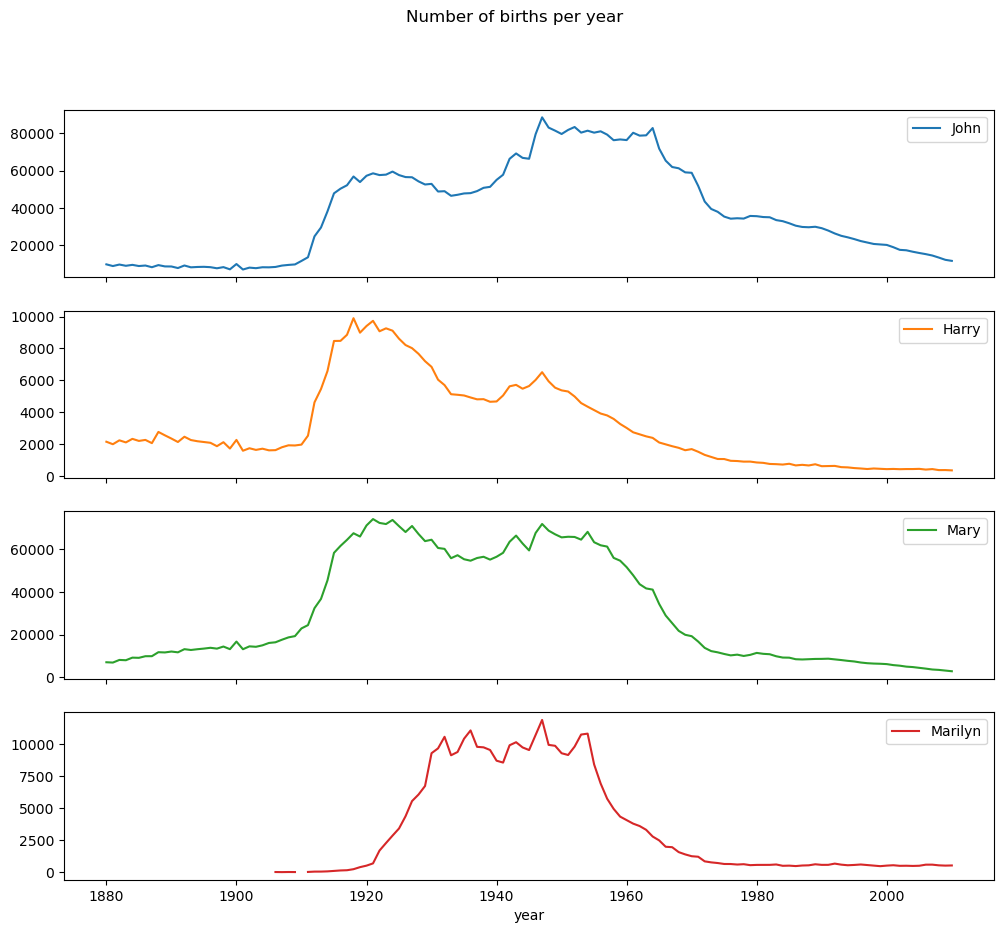

In [22]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10), title="Number of births per year")
plt.show()

#### Đo lường sự đa dạng hóa tên gọi


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_18148\1671835497.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)


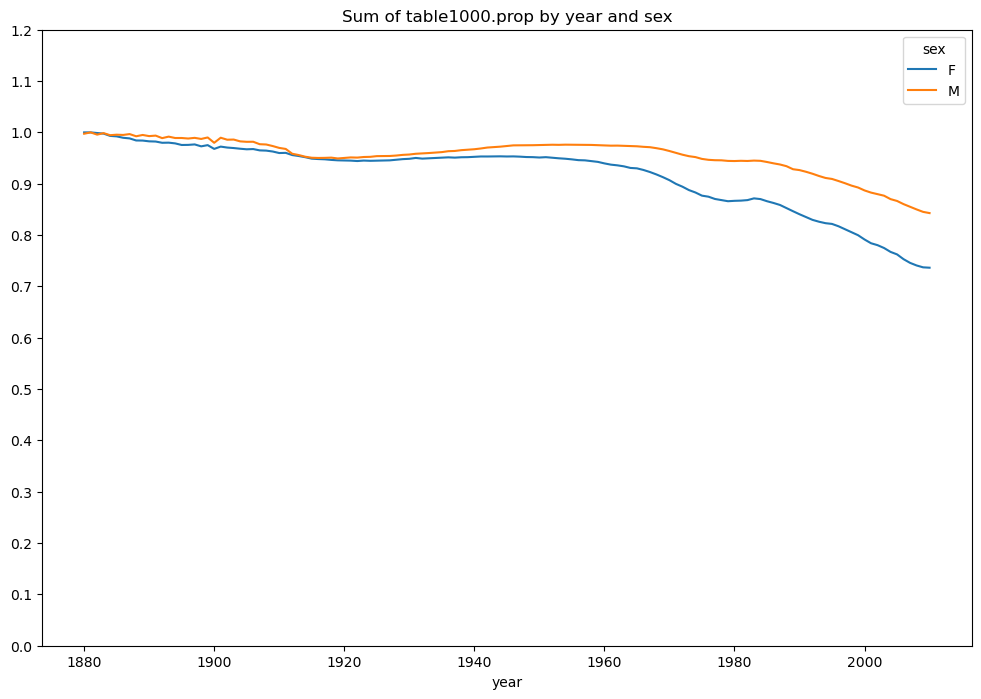

In [26]:
table = top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and sex", yticks=np.linspace(0, 1.2, 13), figsize=(12, 8))
plt.show()

In [27]:
df = boys[boys["year"] == 2010]

df

,name,sex,births,year,prop
260876,Jacob,M,22154,2010,0.011548
260877,Ethan,M,18017,2010,0.009392
260878,Michael,M,17381,2010,0.009060
260879,Jayden,M,17200,2010,0.008966
260880,William,M,17071,2010,0.008899
...,...,...,...,...,...
261871,Taj,M,197,2010,0.000103
261872,Destin,M,196,2010,0.000102
261873,Joziah,M,196,2010,0.000102
261874,Keshawn,M,196,2010,0.000102


In [28]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()

prop_cumsum[:10]

260876    0.011548
260877    0.020940
260878    0.030000
260879    0.038966
260880    0.047864
260881    0.056604
260882    0.065194
260883    0.073463
260884    0.081567
260885    0.089651
Name: prop, dtype: float64

In [29]:
prop_cumsum.searchsorted(0.5)

np.int64(116)

In [30]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

np.int64(25)

In [31]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_18148\537457807.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)


In [32]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


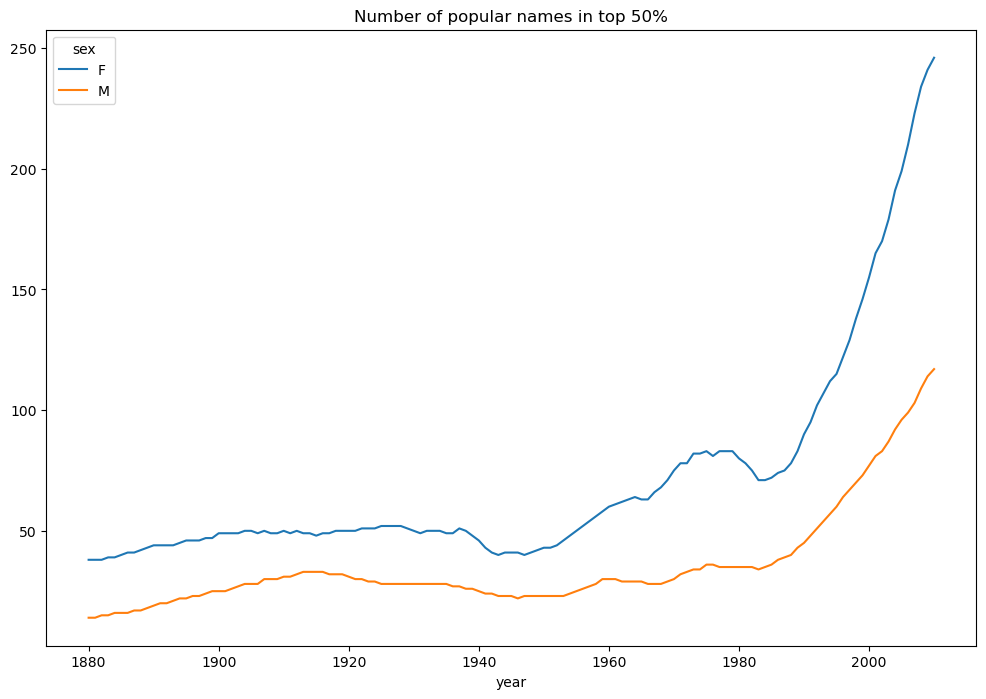

In [36]:
diversity.plot(title="Number of popular names in top 50%", figsize=(12, 8))
plt.show()

#### Phân tích xu hướng "chữ cái cuối cùng"

In [37]:
def get_last_letter(x):
    return x[-1]
last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"
table = names.pivot_table("births", index=last_letters, columns=["sex", "year"], aggfunc=sum)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_18148\1245918110.py:5: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = names.pivot_table("births", index=last_letters, columns=["sex", "year"], aggfunc=sum)


In [38]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691254.0  677566.0    977.0    5216.0   28906.0
b                 NaN     694.0     455.0    411.0    3913.0   39320.0
c                 5.0      49.0     958.0    482.0   15456.0   23378.0
d              6751.0    3732.0    2645.0  22111.0  262105.0   44876.0
e            133599.0  435000.0  317138.0  28665.0  178731.0  130395.0

In [39]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2021900.0
     2010    1777327.0
M    1910     194208.0
     1960    2131915.0
     2010    1918412.0
dtype: float64

In [40]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273388  0.341883  0.381228  0.005031  0.002447  0.015068
b                 NaN  0.000343  0.000256  0.002116  0.001835  0.020496
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012186
d            0.017026  0.001846  0.001488  0.113852  0.122943  0.023392
e            0.336943  0.215144  0.178435  0.147599  0.083836  0.067970
f                 NaN  0.000010  0.000055  0.000783  0.004331  0.001206
g            0.000144  0.000156  0.000376  0.002260  0.009487  0.001407
h            0.051531  0.036222  0.076021  0.045565  0.037912  0.051839
i            0.001526  0.039966  0.031698  0.000844  0.000609  0.022672
j                 NaN       NaN  0.000093       NaN       NaN  0.000774
k            0.000121  0.000155  0.000356  0.036579  0.049366  0.018530
l            0.043188  0.033870  0.026388  0.065023  0.104886  0.070454
m            0.001200  0.008612  0.002602  0.058046  0.033828  0.024706
n            0.079238  0.130675  0.140047  0.143388  0.152521  0.362396
o            0.001672  0.002438  0.001247  0.017064  0.012833  0.042551
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001268
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006765  0.018045  0.064472  0.031049  0.087392
s            0.039036  0.012761  0.013339  0.130798  0.102694  0.065160
t            0.027432  0.015196  0.007837  0.072886  0.065645  0.022856
u            0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001450
w            0.000020  0.000031  0.001191  0.006323  0.007704  0.016182
x            0.000015  0.000037  0.000731  0.003965  0.001851  0.008597
y            0.110975  0.152549  0.116747  0.077345  0.161020  0.058210
z            0.002436  0.000658  0.000700  0.000170  0.000183  0.001830

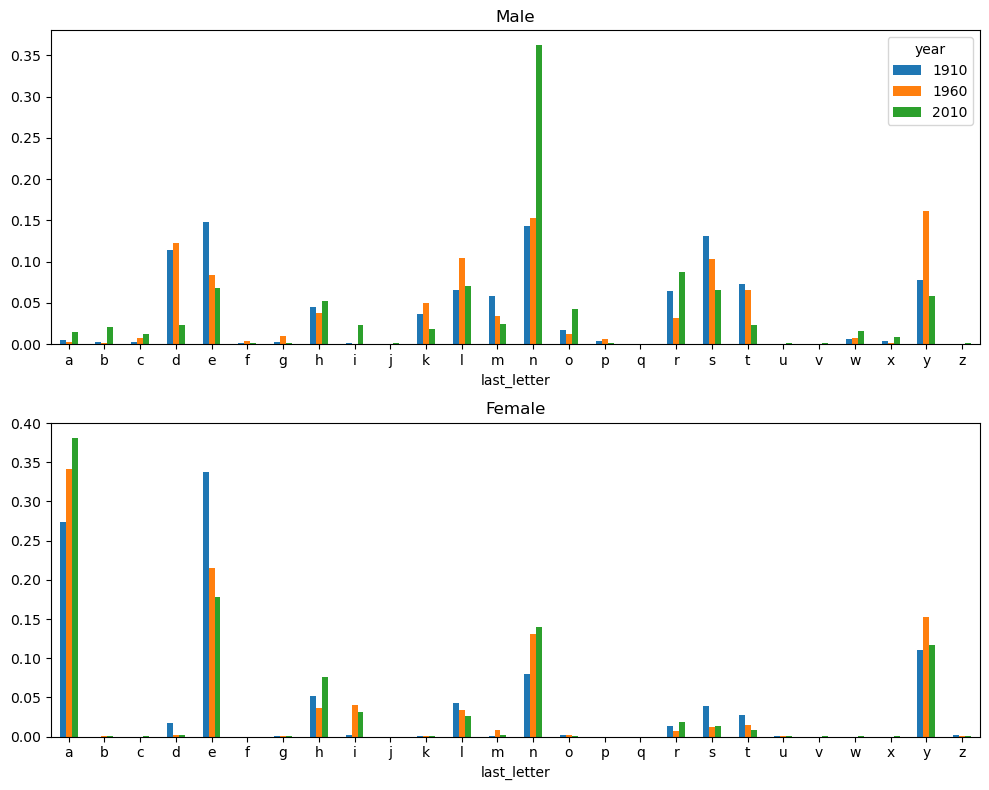

In [44]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female", legend=False)
plt.tight_layout()
plt.show()

In [45]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083238,0.153214,0.077461
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


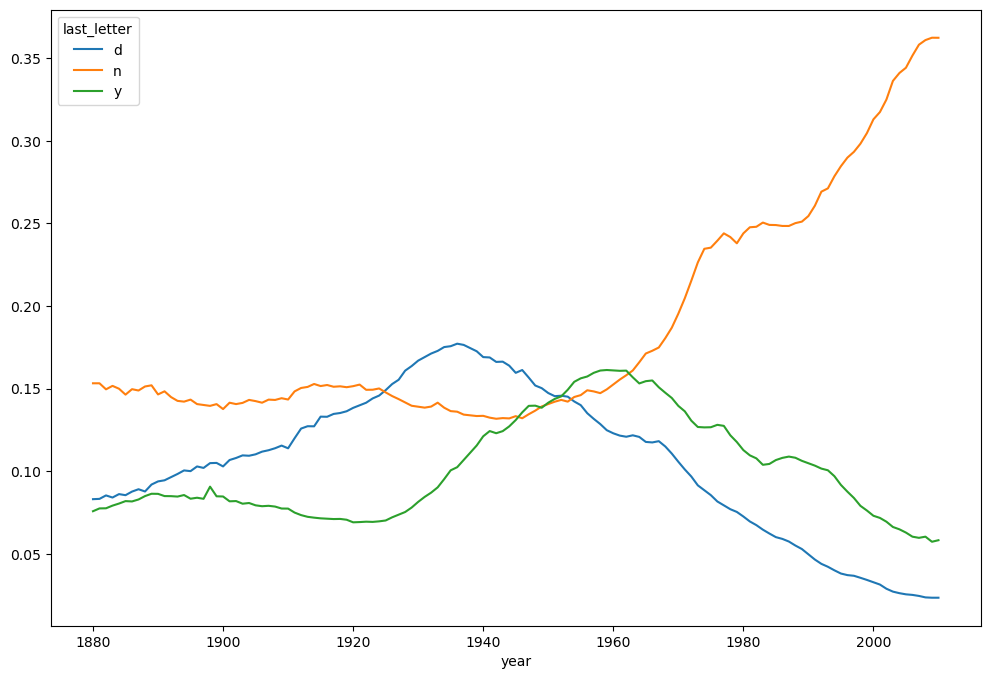

In [47]:
dny_ts.plot(figsize=(12, 8))
plt.show()

#### Phân tích tên chuyển đổi giới tính

In [48]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

645     Leslie
2324    Lesley
4238    Leslee
4709     Lesli
6084     Lesly
dtype: object

In [49]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee       994
Lesley     35029
Lesli        929
Leslie    370585
Lesly      10073
Name: births, dtype: int64

In [50]:
table = filtered.pivot_table("births", index="year", columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


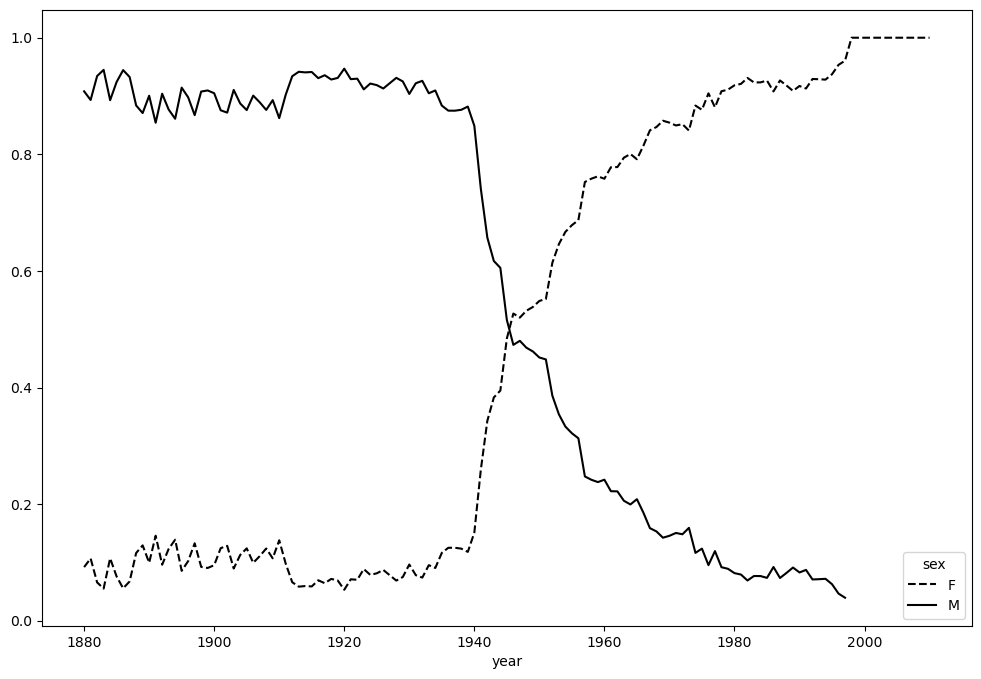

In [52]:
table.plot(style={"M": "k-", "F": "k--"}, figsize=(12, 8))
plt.show()